In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import seaborn as sns

----------

In [2]:
paleta_colores = {
    "bitcoin": "#f2a900",     # amarillo oscuro
    "dogecoin": "#ef4200",    # rojo coral
    "ethereum": "#5572EC",    # azul opaco
    "litecoin": "#BEBBBB",    # gris
    "ripple": "#00adef",      # celeste
    "tether": "#26A17B",      # verde opaco
    "binancecoin": "#6F35FC",   # violeta
    "usd-coin": "#87CEEB",      # azul cielo
    "staked-ether": "#00FF7F",  # verde brillante
    "cardano": "#40E0D0",       # turquesa
    "solana": "#F0B90B",        # amarillo claro
    "tron": "#D02090",          # magenta
    "polkadot": "#E040FB",      # morado claro
    "matic-network": "#8247E5", # índigo
    "shiba-inu": "#D9A441"      # amarillo anaranjado
}

mpl.rcParams.update(mpl.rcParamsDefault)
sns.set(style="whitegrid")

Define una paleta de colores en formato hexadecimal para diferentes criptomonedas según su id y establece un estilo de fondo de cuadrícula blanca para las visualizaciones.

--------

In [3]:
# Total
df_total = pd.read_csv("../data/total.csv")
df_total = df_total.drop(columns=['Unnamed: 0'])
df_total[["anio", "mes"]] = df_total["fecha"].str.split("-", expand=True)

Se carga un conjunto de datos llamado `"total.csv"`. Luego, se elimina una columna no necesaria `("Unnamed: 0")`. Además, se divide la columna `"fecha"` en las columnas `"anio"` y `"mes"` utilizando la función `str.split()` para permitir un análisis temporal más detallado.

-----------

In [4]:
# Halving 2016 
df_halving_2016 = df_total[(df_total['fecha'] >= "2016-01") & (df_total['fecha'] <= "2017-12")]
df_halving_2016_sin_bitcoin = df_halving_2016[(df_halving_2016['id'] != "bitcoin")]

Se crea un nuevo DataFrame llamado `df_halving_2016` que contiene datos del período cercano al halving de Bitcoin en 2016. Luego, se crea otro DataFrame llamado `df_halving_2016_sin_bitcoin` que excluye los datos de Bitcoin del DataFrame anterior.

------

In [5]:
# Halving 2020
df_halving_2020 = df_total[(df_total['fecha'] >= "2019-11") & (df_total['fecha'] <= "2021-10")]
df_halving_2020_sin_bitcoin = df_halving_2020[(df_halving_2020['id'] != "bitcoin")]

Se crea un nuevo DataFrame llamado `df_halving_2020` que contiene datos del período cercano al halving de Bitcoin en 2020. Luego, se crea otro DataFrame llamado `df_halving_2020_sin_bitcoin` que excluye los datos de Bitcoin del DataFrame anterior.

---------------

In [6]:
# Bitcoin
df_bitcoin = df_total[df_total['id'] == 'bitcoin']

Se crea un DataFrame llamado `df_bitcoin` que contiene únicamente los datos relacionados con Bitcoin.

--------------

In [7]:
df_total

,id,precio,fecha,ranking_capitalizacion,capitalizacion,volumen,anio,mes
0,bitcoin,456.434000,2016-01,1,556404486447,1.710584e+09,2016,01
1,dogecoin,0.000449,2016-01,9,9557297683,1.921126e+06,2016,01
2,ethereum,2.519720,2016-01,2,215779763630,1.166954e+07,2016,01
3,litecoin,3.602216,2016-01,14,5528376552,2.786167e+08,2016,01
4,ripple,0.006887,2016-01,5,31228846655,2.889670e+06,2016,01
...,...,...,...,...,...,...,...,...
720,solana,241.691522,2021-12,10,9467020385,6.509911e+09,2021,12
721,staked-ether,4705.735380,2021-12,7,14630479508,1.021761e+08,2021,12
722,tether,1.014148,2021-12,3,82888039545,1.265166e+11,2021,12
723,tron,0.101320,2021-12,11,6680489274,2.791756e+09,2021,12


- `id:` identificador único de la criptomoneda.
- `precio:` precio de la criptomoneda en el mes y año específicos.
- `fecha:` fecha en formato "año-mes" que representa el período de tiempo.
- `ranking_capitalizacion:` ranking de capitalización de mercado de la criptomoneda en ese mes.
- `capitalizacion:` capitalización de mercado de la criptomoneda en el mes específico.
- `volumen:` volumen de negociación de la criptomoneda en ese mes.
- `anio:` año correspondiente al período de tiempo.
- `mes:` mes correspondiente al período de tiempo.

---------

In [8]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      725 non-null    object 
 1   precio                  725 non-null    float64
 2   fecha                   725 non-null    object 
 3   ranking_capitalizacion  725 non-null    int64  
 4   capitalizacion          725 non-null    int64  
 5   volumen                 725 non-null    float64
 6   anio                    725 non-null    object 
 7   mes                     725 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 45.4+ KB


La información proporcionada por `df_total.info()` muestra que el DataFrame `df_total` contiene un total de 725 registros (filas) y 8 columnas. Cada columna tiene la siguiente información:

- `id:` 725 valores no nulos. Tipo de datos: objeto (cadena de texto).
- `precio:` 725 valores no nulos. Tipo de datos: flotante (número decimal).
- `fecha:` 725 valores no nulos. Tipo de datos: objeto (cadena de texto).
- `ranking_capitalizacion:` 725 valores no nulos. Tipo de datos: entero (número entero).
- `capitalizacion:` 725 valores no nulos. Tipo de datos: entero (número entero).
- `volumen:` 725 valores no nulos. Tipo de datos: flotante (número decimal).
- `anio:` 725 valores no nulos. Tipo de datos: objeto (cadena de texto).
- `mes:` 725 valores no nulos. Tipo de datos: objeto (cadena de texto).

Además, el uso de memoria del DataFrame es de aproximadamente 45.4 KB.


-----------

In [9]:
df_total["id"].unique()

array(['bitcoin', 'dogecoin', 'ethereum', 'litecoin', 'ripple', 'tether',
       'binancecoin', 'cardano', 'tron', 'usd-coin', 'matic-network',
       'solana', 'polkadot', 'shiba-inu', 'staked-ether'], dtype=object)

Muestra valores no duplicados dentro de la columna `"id"` del DataFrame `"df_total"`.

-------------

In [10]:
df_halving_2016['id'].unique()

array(['bitcoin', 'dogecoin', 'ethereum', 'litecoin', 'ripple', 'tether',
       'binancecoin', 'cardano', 'tron'], dtype=object)

Muestra valores no duplicados dentro de la columna `"id"` del DataFrame `"df_halving_2016"`.

-----------

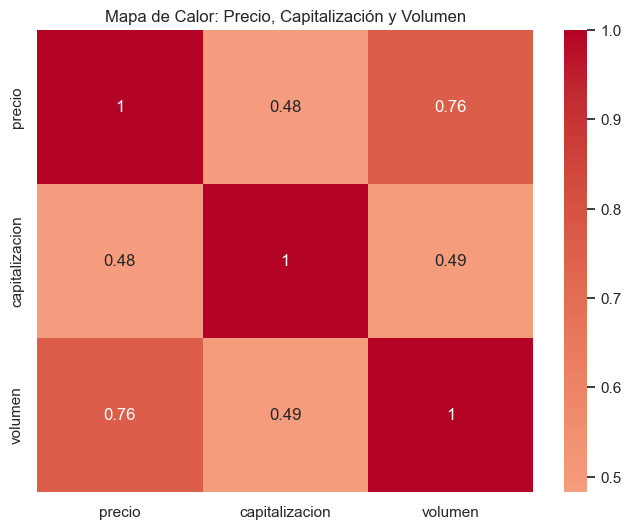

In [26]:
df_halving_2016["fecha"] = pd.to_datetime(df_halving_2016["fecha"])
columns = ["precio", "capitalizacion", "volumen"]
correlation_matrix = df_halving_2016[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Calor: Precio, Capitalización y Volumen")
plt.show()

Hay una correlación moderada positiva de alrededor de 0.483 entre el `"precio"` y la `"capitalización"`, lo que sugiere que tienden a aumentar juntos en cierta medida. La correlación fuerte de aproximadamente 0.760 entre `"precio"` y `"volumen"` indica que un aumento en el precio se relaciona con un incremento significativo en el volumen de transacciones. La relación moderada positiva de cerca de 0.491 entre `"capitalización"` y `"volumen"` implica que, a medida que la capitalización aumenta, el volumen de transacciones también tiende a crecer hasta cierto punto.

---------------

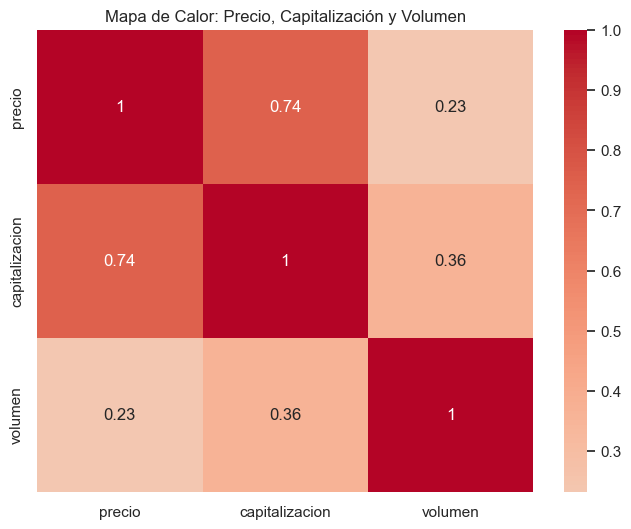

In [28]:
df_halving_2020["fecha"] = pd.to_datetime(df_halving_2020["fecha"])
columns = ["precio", "capitalizacion", "volumen"]
correlation_matrix = df_halving_2020[columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Mapa de Calor: Precio, Capitalización y Volumen")
plt.show()

La correlación positiva fuerte de aproximadamente 0.745 entre `"precio"` y `"capitalización"` sugiere que cuando el precio sube, la capitalización del mercado también tiende a aumentar de manera considerable. La correlación positiva moderada de alrededor de 0.363 entre `"capitalización"` y `"volumen"` indica que a medida que la capitalización crece, hay una tendencia a un aumento proporcional en el volumen de transacciones.

--------

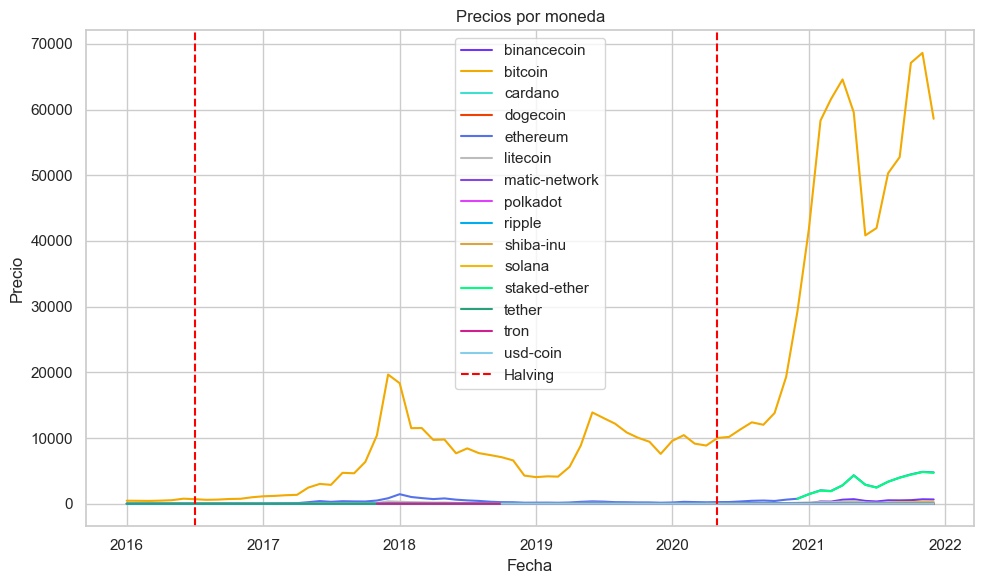

In [11]:
df_total["fecha"] = pd.to_datetime(df_total["fecha"])
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica las líneas temporales
for id, group in df_total.groupby("id"):
    ax.plot(group["fecha"], group["precio"], label=id, color=paleta_colores[id])

# Agrega líneas verticales rojas en las fechas de 'Halving'
ax.axvline(pd.Timestamp("2016-07-01"), color='red', linestyle='--', label='Halving')
ax.axvline(pd.Timestamp("2020-05-01"), color='red', linestyle='--')

# Configura los ejes y la leyenda
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio")
ax.set_title("Precios por moneda")
ax.legend()

date_format = mdates.DateFormatter("%Y")
ax.xaxis.set_major_formatter(date_format)

# Rota las etiquetas de las fechas en el eje x
plt.xticks()

plt.tight_layout()
plt.show()

`Bitcoin` lidera como la primera y más valiosa criptomoneda, mientras que otras como `Ethereum`, `Ripple` y `Cardano` también han ganado prominencia.

Además, los eventos de halving de Bitcoin en 2016 y 2020 han influido en el aumento de los precios de varias criptomonedas.

------------

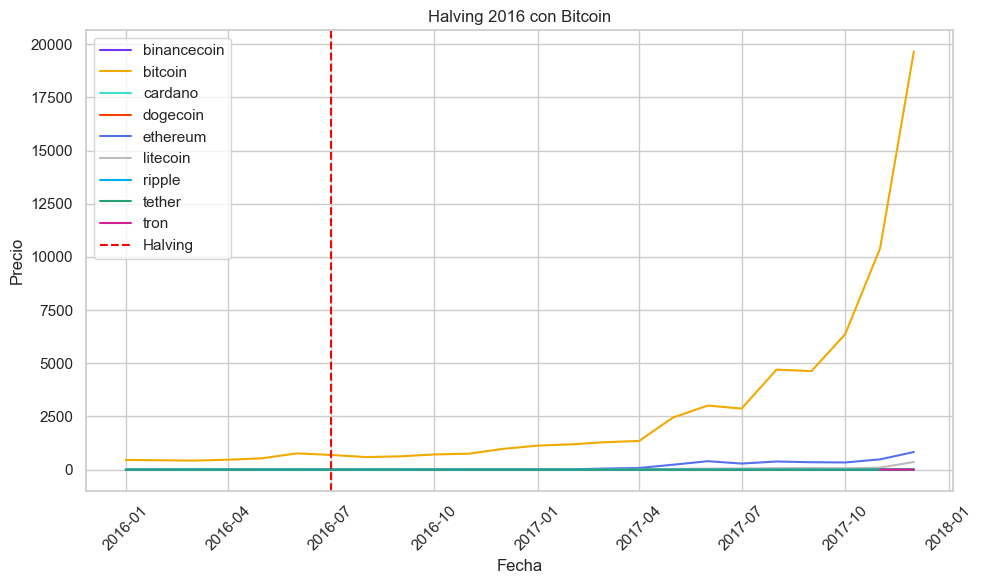

In [12]:
pd.options.mode.chained_assignment = None

df_halving_2016["fecha"] = pd.to_datetime(df_halving_2016["fecha"])

# Hace una copia del DataFrame para evitar un warning
df_copia = df_halving_2016.copy()
df_copia["fecha"] = pd.to_datetime(df_copia["fecha"])

fig, ax = plt.subplots(figsize=(10, 6))

# Grafica las líneas temporales
for id, group in df_copia.groupby("id"):
    ax.plot(group["fecha"], group["precio"], label=id, color=paleta_colores[id])

# Agrega líneas verticales rojas en las fechas de 'Halving'
ax.axvline(pd.Timestamp("2016-07-01"), color='red', linestyle='--', label='Halving')

# Configura los ejes y la leyenda
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio")
ax.set_title("Halving 2016 con Bitcoin")
ax.legend()

# Rota las etiquetas de las fechas en el eje x
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

pd.options.mode.chained_assignment = 'warn'

Vista mas detallada del período 6 meses antes y 1 año y medio después del halving de Bitcoin `2016`.

------------

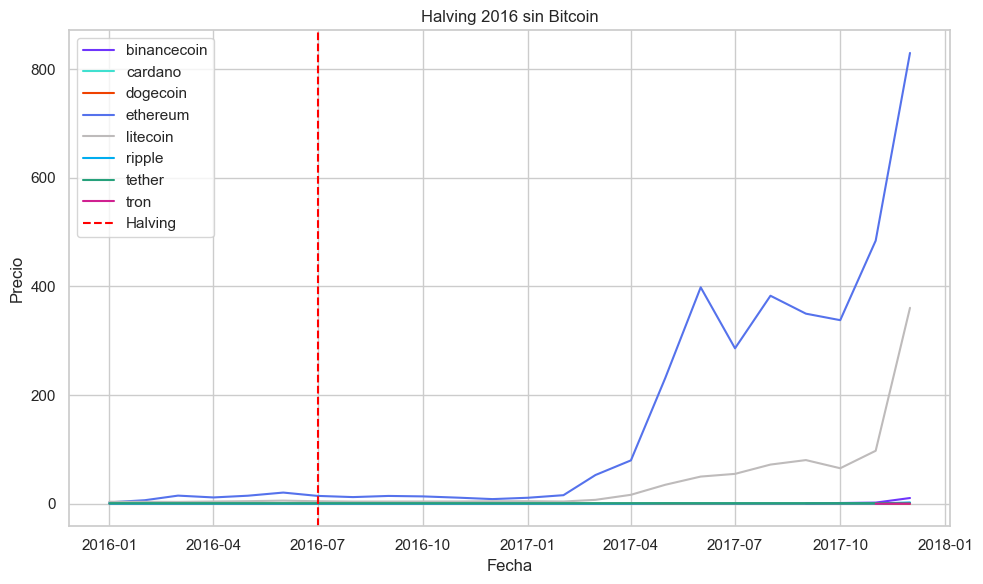

In [20]:
df_halving_2016_sin_bitcoin.loc[:, "fecha"] = pd.to_datetime(df_halving_2016_sin_bitcoin["fecha"])
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica las líneas temporales
for id, group in df_halving_2016_sin_bitcoin.groupby("id"):
    ax.plot(group["fecha"], group["precio"], label=id, color=paleta_colores[id])

# Agrega líneas verticales rojas en las fechas de 'Halving'
ax.axvline(pd.Timestamp("2016-07-01"), color='red', linestyle='--', label='Halving')

# Configura los ejes y la leyenda
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio")
ax.set_title("Halving 2016 sin Bitcoin")
ax.legend()

# Rota las etiquetas de las fechas en el eje x
plt.xticks()

plt.tight_layout()
plt.show()

Halving 2016 sin  `Bitcoin` para ver con mas claridad el crecimiento de otras criptomonedas. `Ethereum` tuvo un crecimiento significativo al igual que `Litecoin`. 

------------

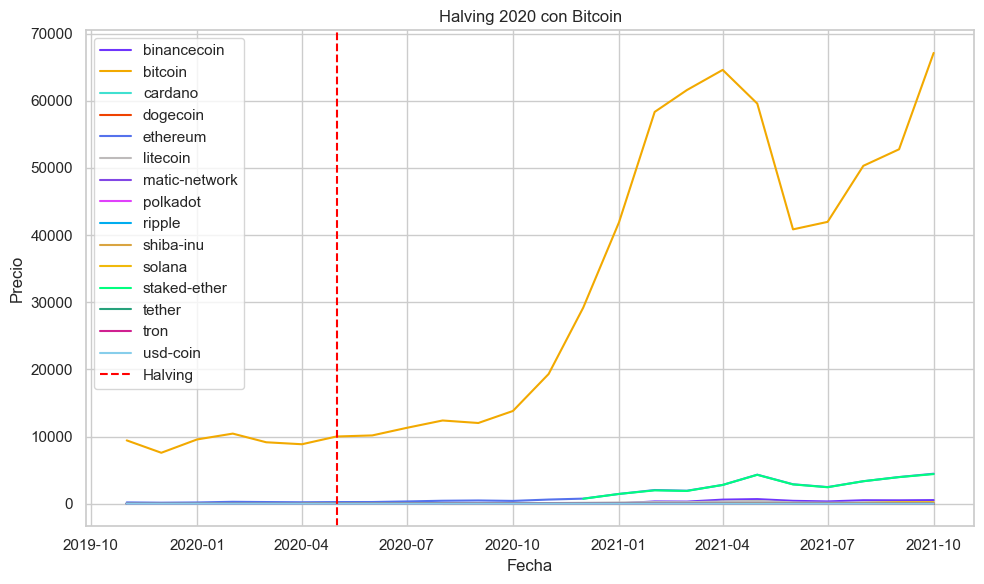

In [21]:
df_halving_2020.loc[:, "fecha"] = pd.to_datetime(df_halving_2020["fecha"])
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica las líneas temporales
for id, group in df_halving_2020.groupby("id"):
    ax.plot(group["fecha"], group["precio"], label=id, color=paleta_colores[id])

# Agrega líneas verticales rojas en las fechas de 'Halving'
ax.axvline(pd.Timestamp("2020-05-01"), color='red', linestyle='--', label='Halving')

# Configura los ejes y la leyenda
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio")
ax.set_title("Halving 2020 con Bitcoin")
ax.legend()

# Rota las etiquetas de las fechas en el eje x
plt.xticks()

plt.tight_layout()
plt.show()

Vista mas detallada del período 6 meses antes y 1 año y medio después del halving de Bitcoin `2020`.

------

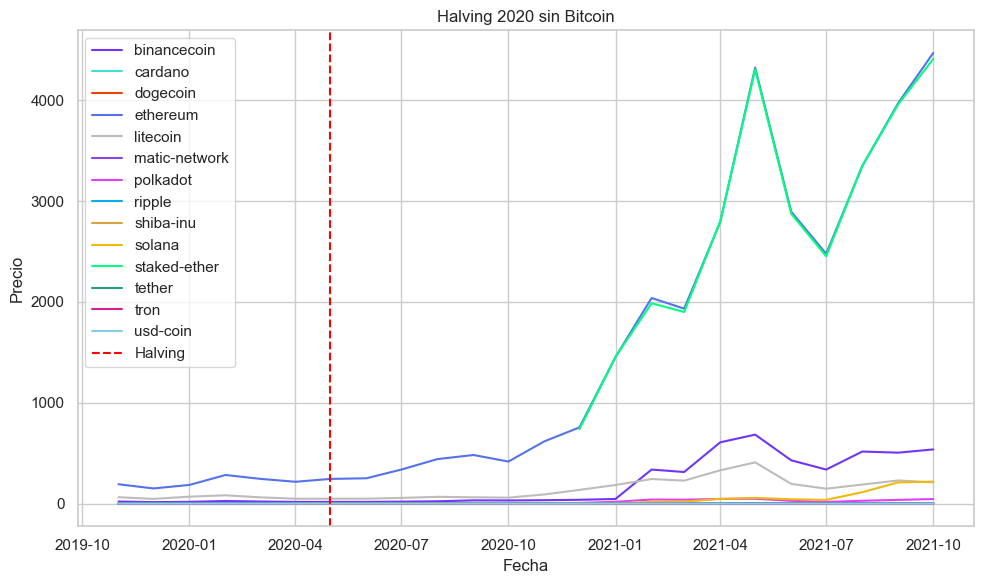

In [22]:
df_halving_2020_sin_bitcoin.loc[:, "fecha"] = pd.to_datetime(df_halving_2020_sin_bitcoin["fecha"])
fig, ax = plt.subplots(figsize=(10, 6))

# Grafica las líneas temporales
for id, group in df_halving_2020_sin_bitcoin.groupby("id"):
    ax.plot(group["fecha"], group["precio"], label=id, color=paleta_colores[id])

# Agrega líneas verticales rojas en las fechas de 'Halving'
ax.axvline(pd.Timestamp("2020-05-01"), color='red', linestyle='--', label='Halving')

# Configura los ejes y la leyenda
ax.set_xlabel("Fecha")
ax.set_ylabel("Precio")
ax.set_title("Halving 2020 sin Bitcoin")
ax.legend()

# Rota las etiquetas de las fechas en el eje x
plt.xticks()

plt.tight_layout()
plt.show()

Halving 2016 sin  `Bitcoin` para ver con mas claridad el crecimiento de las otras criptomonedas. `Ethereum` tuvo un crecimiento significativo al igual que `Binancecoin` y `Litecoin`.

-----------

<Figure size 500x300 with 0 Axes>

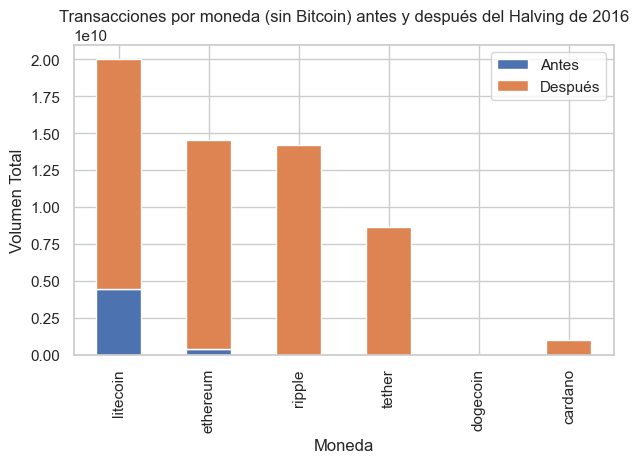

In [16]:
df_halving_2016_sin_bitcoin.loc[:, 'fecha'] = pd.to_datetime(df_halving_2016_sin_bitcoin['fecha'])
data_for_analysis = df_halving_2016_sin_bitcoin[['id', 'fecha', 'volumen']].copy()

# Agrega una columna para indicar si es antes o después de '2016-07'
data_for_analysis.loc[:, 'Antes_despues'] = data_for_analysis['fecha'].apply(lambda x: 'Antes' if x < pd.Timestamp('2016-07') else 'Después')

# Calcula el volumen total antes y después de '2016-07' para cada moneda
volume_totals = data_for_analysis.groupby(['id', 'Antes_despues'])['volumen'].sum().unstack()
top_5_before = volume_totals['Antes'].nlargest(5)
top_5_after = volume_totals['Después'].nlargest(5)
top_5_coins = pd.concat([top_5_before, top_5_after], axis=1, keys=['Antes', 'Después'])

# Gráfico de barras apiladas
plt.figure(figsize=(5, 3))
top_5_coins.plot(kind='bar', stacked=True)

# Agrega etiquetas y título
plt.xlabel('Moneda')
plt.ylabel('Volumen Total')
plt.title('Transacciones por moneda (sin Bitcoin) antes y después del Halving de 2016', loc='center')

plt.tight_layout()
plt.show()



Los datos indican que varias monedas experimentaron aumentos notables en el volumen de transacciones después del "Halving" de Bitcoin en 2016. `Ethereum` y `Litecoin` mostraron aumentos significativos en el volumen.

----------

<Figure size 500x300 with 0 Axes>

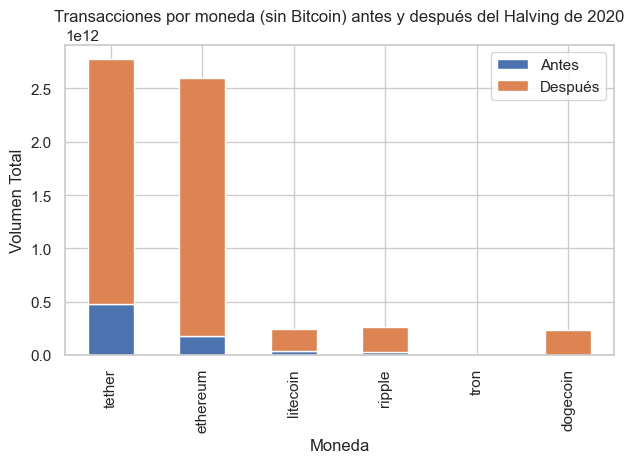

In [17]:
pd.options.mode.chained_assignment = None
df_halving_2020_sin_bitcoin['fecha'] = pd.to_datetime(df_halving_2020_sin_bitcoin['fecha'])
data_for_analysis = df_halving_2020_sin_bitcoin[['id', 'fecha', 'volumen']]

# Agrega una columna para indicar si es antes o después de '2020-05'
data_for_analysis['Antes_despues'] = data_for_analysis['fecha'].apply(lambda x: 'Antes' if x < pd.Timestamp('2020-05') else 'Después')

# Calcula el volumen total antes y después de '2020-05' para cada moneda
volume_totals = data_for_analysis.groupby(['id', 'Antes_despues'])['volumen'].sum().unstack()
top_5_before = volume_totals['Antes'].nlargest(5)
top_5_after = volume_totals['Después'].nlargest(5)
top_5_coins = pd.concat([top_5_before, top_5_after], axis=1, keys=['Antes', 'Después'])

# Gráfico de barras apiladas
plt.figure(figsize=(5, 3))
top_5_coins.plot(kind='bar', stacked=True)

# Agrega etiquetas y título
plt.xlabel('Moneda')
plt.ylabel('Volumen Total')
plt.title('Transacciones por moneda (sin Bitcoin) antes y después del Halving de 2020', loc='center')

plt.tight_layout()
plt.show()

Después del halving de Bitcoin en 2020, se evidencia un aumento notable en el volumen de transacciones para varias monedas como `Ethereum`, `Litecoin` y `Binancecoin`.

-----------

In [18]:
monedas_unicas = df_total["id"].unique()

data = []

# Calcular los valores requeridos para cada moneda
for moneda in monedas_unicas:
    precio_pre_halving = df_total[(df_total["id"] == moneda) & (df_total["fecha"] == "2016-07")]["precio"].values
    precio_final = df_total[(df_total["id"] == moneda) & (df_total["fecha"] == "2017-12")]["precio"].values
    
    if len(precio_pre_halving) > 0 and len(precio_final) > 0:
        precio_pre_halving = precio_pre_halving[0]
        precio_final = precio_final[0]
        porcentaje_crecimiento = ((precio_final - precio_pre_halving) / precio_pre_halving) * 100
        data.append([moneda, precio_pre_halving, precio_final, porcentaje_crecimiento])

columns = ["id", "precio_pre_halving", "precio_final", "porcentaje_crecimiento"]
df_nuevo = pd.DataFrame(data, columns=columns)
df_nuevo["porcentaje_crecimiento"] = df_nuevo["porcentaje_crecimiento"].apply(lambda x: "{:.2f}%".format(x))

df_nuevo


,id,precio_pre_halving,precio_final,porcentaje_crecimiento
0,bitcoin,693.047000,19665.394927,2737.53%
1,dogecoin,0.000302,0.009872,3169.49%
2,ethereum,14.389725,829.989202,5667.93%
3,litecoin,4.544150,360.661762,7836.84%
4,ripple,0.007010,2.280040,32425.53%
5,tether,1.000000,1.074060,7.41%


Este código calcula y muestra el crecimiento porcentual del precio de varias monedas antes y después del halving de Bitcoin de 2016.

---------------

In [19]:
monedas_unicas = df_total["id"].unique()

data = []

# Calcular los valores requeridos para cada moneda
for moneda in monedas_unicas:
    precio_pre_halving = df_total[(df_total["id"] == moneda) & (df_total["fecha"] == "2020-05")]["precio"].values
    precio_final = df_total[(df_total["id"] == moneda) & (df_total["fecha"] == "2021-12")]["precio"].values
    
    if len(precio_pre_halving) > 0 and len(precio_final) > 0:
        precio_pre_halving = precio_pre_halving[0]
        precio_final = precio_final[0]
        porcentaje_crecimiento = ((precio_final - precio_pre_halving) / precio_pre_halving) * 100
        data.append([moneda, precio_pre_halving, precio_final, porcentaje_crecimiento])

columns = ["id", "precio_pre_halving", "precio_final", "porcentaje_crecimiento"]
df_nuevo = pd.DataFrame(data, columns=columns)
df_nuevo["porcentaje_crecimiento"] = df_nuevo["porcentaje_crecimiento"].apply(lambda x: "{:.2f}%".format(x))

df_nuevo


,id,precio_pre_halving,precio_final,porcentaje_crecimiento
0,bitcoin,10008.091136,58612.920116,485.66%
1,dogecoin,0.002686,0.219739,8081.36%
2,ethereum,245.770499,4770.314003,1840.96%
3,litecoin,49.730991,216.237271,334.81%
4,ripple,0.225113,1.015637,351.17%
5,tether,1.012019,1.014148,0.21%
6,binancecoin,17.916075,647.968898,3516.69%
7,cardano,0.075504,1.741638,2206.67%
8,tron,0.016497,0.101320,514.17%
9,usd-coin,1.009046,1.012936,0.39%


Este código calcula y muestra el crecimiento porcentual del precio de varias monedas antes y después del halving de Bitcoin de 2020.